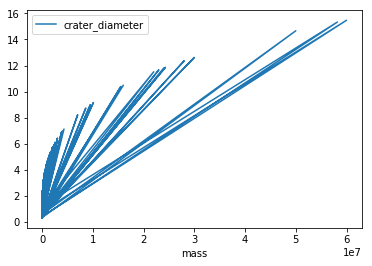

In [9]:
import crater_math as cm
import pandas as pd
import matplotlib.pyplot as plt
import math 

data = pd.read_csv("Datasets/meteorite_data.csv")
data = data[(data>100).all(1)]
df = data.sample(n=10000)

ice = df
ice['KE'] = cm.dataKinEnergy(df['mass'], 20)
ice['crater_diameter'] = cm.solveDiameter(1.3,1,1,ice['KE'], cm.dicProjectileDensity["ice"], cm.dicTargetDensity["sedimentary"])

porous = df
porous['KE'] = cm.dataKinEnergy(df['mass'], 20)
porous['crater_diameter'] = cm.solveDiameter(1.3,1,1,ice['KE'], cm.dicProjectileDensity["porous"], cm.dicTargetDensity["sedimentary"])

dense = df
dense['KE'] = cm.dataKinEnergy(df['mass'], 20)
dense['crater_diameter'] = cm.solveDiameter(1.3,1,1,ice['KE'], cm.dicProjectileDensity["dense"], cm.dicTargetDensity["sedimentary"])

iron = df
iron['KE'] = cm.dataKinEnergy(df['mass'], 20)
iron['crater_diameter'] = cm.solveDiameter(1.3,1,1,ice['KE'], cm.dicProjectileDensity["iron"], cm.dicTargetDensity["sedimentary"])


ice.set_index('mass').plot(y='crater_diameter')
